In [1]:
""" generically summarize learning-related effects.
Here is like a condensed version of the task-scoring plots previously coded (for lines5
mainly).
Goal here is to simplify, main plots, quicker code (working with datasets)
And potentially flexibly combine with models later on.
(This spurred by BRAIN INitiative poster, wanting to make simple histogram of num strokes
in epoch 1 and 2)

LOGGING PROGRESS FOR PORTING FROM analysis_TEMPLATE (Probedat)
- behavior plots: DONE [main useful ones. not yet separate by block. see README.md]
- scoring: DONE [except separating by block] 

"""


' generically summarize learning-related effects.\nHere is like a condensed version of the task-scoring plots previously coded (for lines5\nmainly).\nGoal here is to simplify, main plots, quicker code (working with datasets)\nAnd potentially flexibly combine with models later on.\n(This spurred by BRAIN INitiative poster, wanting to make simple histogram of num strokes\nin epoch 1 and 2)\n\nLOGGING PROGRESS FOR PORTING FROM analysis_TEMPLATE (Probedat)\n- behavior plots: DONE [main useful ones. not yet separate by block. see README.md]\n- scoring: DONE [except separating by block] \n\n'

In [1]:
# install packages

%load_ext autoreload
%autoreload 2

import sys
sys.path.append('.')
sys.path.append('~/Desktop/rockefeller/pythonlib')
import os
# change to pythonlib for installation & import
os.chdir('/Users/kgg/Desktop/rockefeller/pythonlib')
!{sys.executable} -m pip install imageio
!{sys.executable} -m pip install pythonlib
!{sys.executable} -m pip install pickle5


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-co

In [2]:
# %cd ..
# from tools.utils import * 
# from tools.plots import *
# from tools.analy import *
# from tools.calc import *
# from tools.analyplot import *
# from tools.preprocess import *
# from tools.dayanalysis import *

from pythonlib.drawmodel.analysis import *
from pythonlib.tools.stroketools import *
import pythonlib
from pythonlib.dataset.dataset import Dataset
import pickle
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Simple summaries

#### Plot behavior (raw)

In [5]:
##### Related to "Task scores" (porting from probedat analyses, will replace it)
### NOTE: currently is partly hard coded for biasdir expts (angle stuff). need to modify to 
# be more general.

# Load dataset

# INPUTS:
# for animal in ["Pancho"]:
#     for expt in ["lines5"]:

# animal = "Pancho"
# expt = "lines5"
# rule = ["straight", "bent"]
# for animal in ["Diego", "Pancho"]:
# #     animal = "Pancho"
#     expt = "linecircle"
#     rule = ["null"]

# --------------- INPUT PARAMS
PLOT_OVERVIEW = False
PLOT_TEST_TASK_IMAGES = False
PLOT_EXAMPLE_DATEVTASK = False
PLOT_ALL_EACHTRIAL = False
PLOT_TRAIN_GRID = False
PLOT_TRAIN_REPEATED = False # things repeated even though random.

base_dir = os.path.expanduser("~/data2")
drawmonkey_dir = "/home/lucast4/drawmonkey"
expt = "chunkbyshape2" #run for chunkbyshape1, chunkbyshape2
animal_list = ["Diego"]


def get_rulelist(animal, expt):
    from pythonlib.dataset.dataset_preprocess.general import extract_expt_metadat
    list_expts = extract_expt_metadat(animal=animal, expt=expt, metadat_dir=f"{base_dir}/expt_metadat") ##CHANGE## metadat_dir if necessary
    rulelist = [e[1] for e in list_expts]
    assert len(rulelist)>0
    return rulelist

#     if expt=="gridlinecircle":
#         if animal == "Pancho":
#             rule = ["baseline", "linetocircle", "circletoline", "lolli"]
#         elif animal =="Diego":
#             rule = ["baseline", "circletoline", "linetocircle", "lolli"]
#         elif animal =="Red":
#             rule = ["baseline", "Ltoline"]
#         else:
#             assert False
#     elif expt=="figures9":
#         rule = ["bent", "straight"]
#     elif expt in ["chunkbyshape1", "chunkbyshape2"]:
#         rule = ["vert", "horiz"]
#     elif expt in ["chunkbyshape4"]:
#         rule = ["baseline", "horiz", "vert"]
#     else:
#         assert False
#     return rule


# --------------- RUN
# for animal in ["Pancho", "Diego", "Red"]:
for animal in animal_list:

    rulelist = get_rulelist(animal, expt)
    D = Dataset([])
    D.load_dataset_helper(animal, expt, ver="mult", rule=rulelist)
    D.load_tasks_helper()

    ##### PREPROCESS to extract features for each trial
    # 1) model-free features
    from pythonlib.dataset.dataset_preprocess.general import preprocessDat
    D, GROUPING, GROUPING_LEVELS, FEATURE_NAMES, SCORE_COL_NAMES = preprocessDat(D, expt)
    
    # 1) extract supervision params to Dat
    from pythonlib.tools.pandastools import applyFunctionToAllRows
    def F(x, abbrev = True):
        S = x["supervision_params"]

        # sequence
        if S["sequence_on"]==False:
            seq = "off"
        else:
            seq = S["sequence_ver"]

        # dynamic
        dyna = S["guide_dynamic_strokes"]
        if dyna:
            d = 1
        else:
            d=0

        # color
        colo = S["guide_colored_strokes"]
        if colo:
            c=1
        else:
            c=0

        # give a condensed name
        if seq=="off":
            s = 0
        elif seq=="v3_remove_and_show":
            s = 3
        elif seq=="v3_remove_and_fadein":
            s = 4
        elif seq=="v3_noremove_and_show":
            s = 5
        elif seq=="v3_noremove_and_fadein":
            s = 6
        elif seq=="v4_fade_when_touch":
            s=1
        elif seq=="v4_remove_when_touch":
            s=2
        elif seq=="unknown":
            s=7
        elif seq=="objectclass_active_chunk":
            s=8
        else:
            print(seq)
            print("what is this?")
            assert False

        if abbrev:
            return (s,d,c)
        else:
            return seq, dyna, colo
    if expt in ["chunkbyshape1"]:
        # TODO: define supervision stage using ObjectCalss only
        if False:
            # Start from here
            TT = T.Params["input_params"]
            Tnew = TT.get_tasknew()
            Tnew["Objects"]["Params"]
        else:
            # For now, just hack it 
            Fthis = lambda x: (0,0,0)
    else:
        Fthis = F
    D.Dat = applyFunctionToAllRows(D.Dat, Fthis, "supervision_stage")


    SDIR_MAIN = f"{base_dir}/analyses/main/simple_summary/{animal}-{expt}-{'_'.join(rulelist)}"
    os.makedirs(SDIR_MAIN, exist_ok=True)
    SAVEDIR_FIGS = f"{SDIR_MAIN}/FIGS/drawfigs"
    os.makedirs(SAVEDIR_FIGS, exist_ok=True)
    MAX_COLS = 20

    #### PLOT OVERVIEW OF EXPERIMENT
    if PLOT_OVERVIEW:
        figlist = D.plotOverview()
        for i, fig in enumerate(figlist):
            fig.savefig(f"{SDIR_MAIN}/overview_{i}.pdf")

        # Plot overview, separating by supervision
        fig = sns.catplot(data=D.Dat, x="block", y="supervision_stage", col="task_stagecategory", row="date")
        fig.savefig(f"{SDIR_MAIN}/overview_supervisionstage.pdf")

    ##### Any random tasks that are repeated?
    
    
    ## Plot all test tasks stimuli
    # Get all uique test tasks
    if PLOT_TEST_TASK_IMAGES:
        # TODO: split by set category, and features.
        # get list of unique tasks
        df = D.filterPandas({"monkey_train_or_test":["test"]}, "dataframe")
        tasklist = sorted(df["character"].unique())
        if len(tasklist)>50:
            assert False, "break it up into multiple plots"
        
        # Only keep one per unique task
        indices = []
        for task in tasklist:
            ind = D.filterPandas({"character":[task]})[0] # get the first
            indices.append(ind)
        
        # Plot and save
        sdirthis = f"{SAVEDIR_FIGS}/all_test_task_images"
        os.makedirs(sdirthis, exist_ok=True)

        fig, axes, _ = D.plotMultTrials2(indices, "strokes_task", titles=tasklist, SIZE=3.2, 
                          plotkwargs={"naked_axes":True});
        fig.savefig(f"{sdirthis}/all_images_1.pdf")
        

    ##### Plot drawing behavior over entire experiment.
    ############ 1) Fixed tasks (train and test), plot mult trials per task, in structured way (GOOD)
    # sort based on supervision stage
    stages = D.Dat["supervision_stage"].unique()
    # temporary fix for halted run; remove after done
    print("stages", stages)
    for s in stages[5:]:
    # end temporary fix
    #for s in stages:
        for t in ["test", "train"]:
            Dthis = D.filterPandas({"random_task":[False], "monkey_train_or_test":[t], "supervision_stage":[s]}, "dataset")
            if len(Dthis.Dat)>0:

                #### 2) A single category, over all time
                if PLOT_EXAMPLE_DATEVTASK:
                    from pythonlib.dataset.dataset_analy.summary import plot_summary_drawing_examplegrid
                    plot_summary_drawing_examplegrid(Dthis, SAVEDIR_FIGS, f"{t}/stage{s}", 
                                     "date")
                    plot_summary_drawing_examplegrid(Dthis, SAVEDIR_FIGS, f"{t}/stage{s}", 
                                     "epoch")

    #                 sdirthis = f"{SAVEDIR_FIGS}/date_vs_task/stage_{s}"
    #                 os.makedirs(sdirthis, exist_ok=True)
    #                 from pythonlib.dataset.plots import plot_beh_grid_grouping_vs_task

    #                 taskcats = Dthis.Dat["task_stagecategory"].unique()
    #                 for tc in taskcats:
    #                     tasklist = Dthis.Dat[Dthis.Dat["task_stagecategory"]==tc]["character"].unique()
    #                     row_variable = "date"

    #                     LIST_N_PER_GRID = [1]
    # #                     LIST_N_PER_GRID = [1, 3]
    #                     for max_n_per_grid in LIST_N_PER_GRID:
    #                         if max_n_per_grid==1:
    #                             n = 4
    #                         else:
    #                             n=1
    #                         for i in range(n):
    #                             # Iterate, since is single plots.
    #                             figb, figt = plot_beh_grid_grouping_vs_task(Dthis.Dat, row_variable, 
    #                                                                         tasklist, 
    #                                                                         max_n_per_grid=max_n_per_grid, 
    #                                                                        plotkwargs={"strokes_by_order":True})
    #                             figb.savefig(f"{sdirthis}/{tc}-npergrid{max_n_per_grid}-iter{i}-beh.pdf");
    #                             figt.savefig(f"{sdirthis}/{tc}-npergrid{max_n_per_grid}-iter{i}-task.pdf");
    #                         plt.close("all")

                #### 1) A single task, over time.
                if PLOT_ALL_EACHTRIAL:
                    assert("fix this so that it splits train/test into separate plots -- see above", False)

                    sdirthis = f"{SAVEDIR_FIGS}/each_task_all_trials/stage_{s}"
                    os.makedirs(sdirthis, exist_ok=True)

                    tasklist = Dthis.Dat["character"].unique()

                    from pythonlib.dataset.plots import plot_beh_grid_singletask_alltrials, plot_beh_grid_flexible_helper
                    for task in tasklist:
                    #     task = "mixture2_1-savedset-50-39276"
                        row_variable = "date"
                        if False:
                            # Old version
                            figb, figt = plot_beh_grid_singletask_alltrials(D, task, row_variable, max_cols = MAX_COLS)
                        else:
                            # New version, plotting trialcode, and coloring by order
                            Dthis = D.filterPandas({"character":task}, "dataset")
                            figb, figt = plot_beh_grid_flexible_helper(Dthis, "date", "trial", plotkwargs={"strokes_by_order":True})
                        figb.savefig(f"{sdirthis}/{task}-beh.pdf");
                        figt.savefig(f"{sdirthis}/{task}-task.pdf");
                        plt.close("all")
            else:
                print("Dthis is blank, maybe something wrong with data selection?")
                    
    ######### 2) Plot all training tasks (lumps random and fixed) into random grids.
    if PLOT_TRAIN_GRID:
        Dtrain = D.filterPandas({"monkey_train_or_test":["train"]}, "dataset")

        # 1) plot random train tasks (beh + test)
        # separate plots for each level of grouping (e..g, epoch), each block, each supervision kind, date
        stages = Dtrain.Dat["supervision_stage"].unique()
        dates = Dtrain.Dat["date"].unique()
        blocks = Dtrain.Dat["block"].unique()

        nrand = 20
        niter = 1 
        nmin = 3
        
        for lev in GROUPING_LEVELS:
            for d in dates:
                for s in stages:

                    for b in blocks:
                        inds = Dtrain.filterPandas({
                            GROUPING:[lev],
                            "date":[d],
                            "supervision_stage":[s],
                            "block":[b]})
                        if len(inds)>nmin:
                            print("running: ", (lev, d, s, b))

                            # Savedir
                            sdirthis = f"{SDIR_MAIN}/FIGS/drawfigs/traintasks_randomgrid/{lev}/{d}/{s}"
                            os.makedirs(sdirthis, exist_ok=True)

                            if len(inds)<1.5*nrand:
                                # dont plot multipel times if not that many trials.
                                niterthis = 1
                            else:
                                niterthis = niter

                            for i in range(niterthis):
                                # Plot these inds
                                figbeh, indsthis = Dtrain.plotMultTrials(inds, "strokes_beh", return_idxs=True, nrand=nrand,
                                                                        naked_axes=True, add_stroke_number=False)
                                figtask = Dtrain.plotMultTrials(indsthis, "strokes_task", return_idxs=False, nrand=nrand,
                                                                       naked_axes=True, add_stroke_number=False)

                                # SAVE
                                figbeh.savefig(f"{sdirthis}/block{b}-iter{i}-beh.pdf")
                                figtask.savefig(f"{sdirthis}/block{b}-iter{i}-task.pdf")             

                            plt.close("all")
    
    ####### Random train tasks that were repeated.
    if PLOT_TRAIN_REPEATED:
        nmin_trials= 6 # min num repeated trials.
        nmin_tasksplot = 100 # take top 100 tasks.
        Dtrain = D.filterPandas({"random_task":[True], "monkey_train_or_test":["train"]}, "dataset")

        # Hash each task shapes
        list_shapeshash = [] # each tasks shape hash

        for i in range(len(Dtrain.Dat)):
            list_shapeshash.append(Dtrain.Dat.iloc[i]["Task"].get_shapes_hash())


        ## Get all inds that have the same task (defined by shapes)
        # 1) assign back into dat the hash
        Dtrain.Dat["Task_shapeshash"] = list_shapeshash

        # 2) plot one
        if False:
            import random
            thishash = random.choice(list_shapeshash)
            inds = Dtrain.filterPandas({"Task_shapeshash":[thishash]})
            print(inds)
            Dtrain.plotMultTrials(inds);
            inds = inds[:20]
            Dtrain.plotMultTrials(inds, "strokes_task");

        sdirthis = f"{SDIR_MAIN}/FIGS/drawfigs/traintasks_repeatedtrials"
        sdirthis_raw = f"{SDIR_MAIN}/FIGS/drawfigs/traintasks_repeatedtrials/each_task"
        os.makedirs(sdirthis, exist_ok=True)
        os.makedirs(sdirthis_raw, exist_ok=True)

        # How often where tasks repeated?
        a = Dtrain.Dat["Task_shapeshash"].value_counts().tolist()

        fig = plt.figure()
        plt.hist(a, range(max(a)), log=True);
        plt.ylabel('counts');
        plt.xlabel('num repetitions per unique task')
        plt.title(f"This many unique tasks: {len(a)}")
        fig.savefig(f"{sdirthis}/num_repeats_per_task-1.pdf")

        fig = plt.figure()
        plt.hist(a, range(max(a)), log=False);
        plt.ylabel('counts');
        plt.xlabel('num repetitions per unique task')
        plt.title(f"This many unique tasks: {len(a)}")
        fig.savefig(f"{sdirthis}/num_repeats_per_task-2.pdf")


        ### For each unique task, plot across days
        # get all unique tasks with greater than N trials
        a = Dtrain.Dat["Task_shapeshash"].value_counts()
        a = a[a>nmin_trials]
        a = a[:nmin_tasksplot]

        # save a dict of names
        from pythonlib.tools.expttools import writeDictToYaml
        namesdict = {i:a.index[i] for i in range(len(a))}
        writeDictToYaml(namesdict, f"{sdirthis}/tasknames.yaml")

        for i in range(len(a)):
            name = a.index[i]
            inds = Dtrain.filterPandas({"Task_shapeshash":[name]})
            inds = inds[:20]
            figbeh = Dtrain.plotMultTrials(inds);
            figtask = Dtrain.plotMultTrials(inds, "strokes_task");

            figbeh.savefig(f"{sdirthis_raw}/task{i}-beh.pdf")
            figtask.savefig(f"{sdirthis_raw}/task{i}-task.pdf");

            plt.close("all")

Searching using this string:
/Users/kgg/data2/expt_metadat/*chunkbyshape2*Diego**
Found this many paths:
2
---
/Users/kgg/data2/expt_metadat/chunkbyshape2-horiz-Diego.yaml
---
/Users/kgg/data2/expt_metadat/chunkbyshape2-vert-Diego.yaml
Searching using this string:
/Users/kgg/data2/analyses/database/*Diego*chunkbyshape2*horiz*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/Users/kgg/data2/analyses/database/BEH/*Diego*chunkbyshape2*horiz*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/Users/kgg/data2/analyses/database/BEH/Diego-chunkbyshape2-horiz-220329_112156
Searching using this string:
/Users/kgg/data2/analyses/database/*Diego*chunkbyshape2*vert*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/Users/kgg/data2/analyses/database/BEH/*Diego*chunkbyshape2*vert*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/Users/kgg/data2/analyses/database/

In [6]:
# pull out chunkorder / 'rule'

t = D.Dat.iloc[40]['Task']
t.Params['input_params'].get_tasknew()['Objects']['ChunkList']

{'StrokeSequence': {'1': {'Index': array([[1.],
          [2.]]),
   'Pts': {},
   'Flipped': array([[0]], dtype=uint8),
   'FlippedEachIndex': array([[0.],
          [0.]])},
  '2': {'Index': array([[3.],
          [4.],
          [5.]]),
   'Pts': {},
   'Flipped': array([[0]], dtype=uint8),
   'FlippedEachIndex': array([[0.],
          [0.],
          [0.]])}},
 'FeaturesStruct': {'1': {'shapes': {'1': array([], shape=(0, 0), dtype=float64)},
   'closed': {'1': array([], shape=(0, 0), dtype=float64)},
   'color': {'1': array([[0.44553247],
           [0.48421633],
           [0.37216478]])},
   'info': {'1': {}},
   'nctrl': {'1': array([], shape=(0, 0), dtype=float64)},
   'use_manual_nctrl': {'1': array([], shape=(0, 0), dtype=float64)}},
  '2': {'shapes': {'1': array([], shape=(0, 0), dtype=float64)},
   'closed': {'1': array([], shape=(0, 0), dtype=float64)},
   'color': {'1': array([[0.34744666],
           [0.66584735],
           [0.52540098]])},
   'info': {'1': {}},
   'nct

#### investigating dataset for missing values...

(0, 0, 0)    808
(8, 1, 0)    514
(7, 1, 1)    201
(7, 1, 0)    184
(7, 0, 1)     35
(7, 0, 0)     16
(0, 0, 1)      2
Name: supervision_stage, dtype: int64
TEST TASKS
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
TRAIN TASKS
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['vert' 'horiz']
['ve

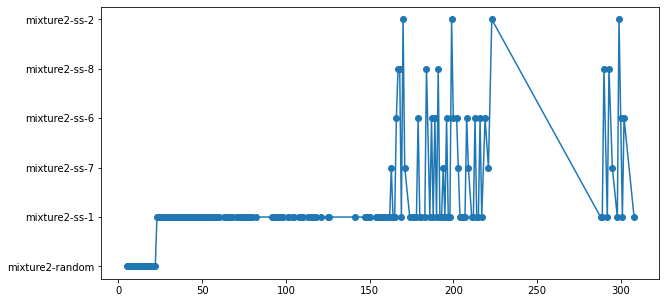

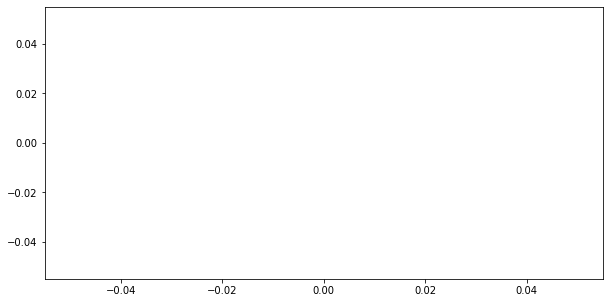

In [7]:
df = D.Dat

# slice out specific stage
missing1 = df["supervision_stage"]
print(missing1.value_counts())

# slice out specific date
date = df[df["datetime"].str.contains("220308")] 

# plot all trials in each session
import matplotlib.pyplot as plt
for i in range(1,3):
    session = date[date["session"].eq(i)]
    fig = plt.figure(figsize=(10,5))
    plt.plot(session["trial"],session["task_stagecategory"], "-o")

# slice out specific task
date[date["unique_task_name"].str.contains("51788")]

# examine all TEST tasks, see if they are displayed in both horiz/vert (for chunkbyshape2)
test_data = df.loc[df["monkey_train_or_test"]=="test"]
test_task_names = test_data["unique_task_name"].unique()

print("TEST TASKS")
for t in test_task_names:
    all_tasks_with_name_t = test_data.loc[test_data["unique_task_name"]==t]
    print(all_tasks_with_name_t["epoch"].unique()) # should print ['vert', 'horiz'] for ALL tasks
    
# examine all TRAIN tasks, see if they are displayed in both horiz/vert (for chunkbyshape2)
train_data = df.loc[df["monkey_train_or_test"]=="train"]
train_task_names = train_data["unique_task_name"].unique()

print("TRAIN TASKS")
for t in train_task_names:
    all_tasks_with_name_t = train_data.loc[train_data["unique_task_name"]==t]
    print(all_tasks_with_name_t["epoch"].unique())
        

##### doing some basic data analysis

In [8]:
# generates behclass for all trials
D.behclass_generate_alltrials()

stored in self.Dat[BehClass]


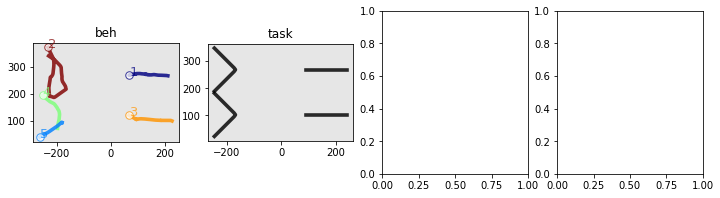

In [14]:
import random

df = D.Dat
trial = random.choice(range(len(df)))

D.plotSingleTrial(trial);
beh = df.iloc[trial]["BehClass"]

(<Figure size 288x180 with 2 Axes>, <Figure size 432x288 with 2 Axes>)

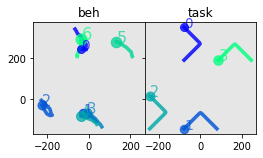

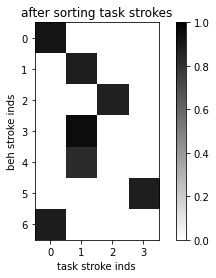

In [10]:
beh.alignsim_compute(True)
beh.alignsim_plot_summary()

In [11]:
beh.alignsim_extract_datsegs()

[{'shape': 'L-5',
  'shape_oriented': 'L-5',
  'gridloc': (0, 1),
  'rel_from_prev': 'start',
  'rel_to_next': 'far',
  'h_v_move_from_prev': 'start',
  'h_v_move_to_next': 'vertical'},
 {'shape': 'L-6',
  'shape_oriented': 'L-6',
  'gridloc': (0, -1),
  'rel_from_prev': 'far',
  'rel_to_next': 'left',
  'h_v_move_from_prev': 'vertical',
  'h_v_move_to_next': 'horizontal'},
 {'shape': 'L-5',
  'shape_oriented': 'L-5',
  'gridloc': (-1, -1),
  'rel_from_prev': 'left',
  'rel_to_next': 'far',
  'h_v_move_from_prev': 'horizontal',
  'h_v_move_to_next': 'diagonal'},
 {'shape': 'L-6',
  'shape_oriented': 'L-6',
  'gridloc': (1, 1),
  'rel_from_prev': 'far',
  'rel_to_next': 'end',
  'h_v_move_from_prev': 'diagonal',
  'h_v_move_to_next': 'end'}]

In [15]:
#### pipeline for calculating verticality/diagonality scores for all trials

#D.behclass_generate_alltrials()
df = D.Dat
df["verticality"] = np.nan
df["diagonality"] = np.nan

#### loop
for i in range(0, len(df)):
    # grab behclass object for this row
    beh = df.iloc[i]["BehClass"]
    # compute alignsim
    beh.alignsim_compute(True)
    # get list of datsegs
    datsegs = beh.alignsim_extract_datsegs()

    # calculations
    num_v = 0
    num_h = 0
    num_d = 0
    
    # count total h,v moves
    for j in range(0, len(datsegs)):
        seg = datsegs[j]
        hv_prev = seg["h_v_move_from_prev"]

        if hv_prev=="vertical":
            num_v = num_v + 1
        elif hv_prev=="horizontal":
            num_h = num_h + 1
        elif hv_prev=="diagonal":
            num_d = num_d + 1
        else: #start
            print("hv_prev is start")

    verticality = np.nan
    diagonality = np.nan
    # ratio score between [0,1]; 1 is VERTICAL, 0 is HORIZONTAL, 0.5 is EQUAL
    if num_v == 0 and num_h == 0: # likely just 1 stroke
        verticality = -1
    else:
        verticality = num_v/(num_v + num_h)
    
    # ratio score between [0, 1]; 1 is super diagonal, lots of switching
    if num_d == 0: # two cases
        if num_v == 0 and num_h == 0:
            diagonality = -1 # likely just 1 stroke
        else:
            diagonality = 0.0 # could be horizontal, or vertical, task; true diagonality score 0.0
    else:
        diagonality = num_d/(num_d + num_v + num_h)
        
    df.loc[i,["verticality"]] = verticality ## must use loc, not chained-indexing
    df.loc[i,["diagonality"]] = diagonality ## must use loc, not chained-indexing


hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is sta

hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is sta

hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is sta

hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is start
hv_prev is sta

trial:  401
verticality:  1.0


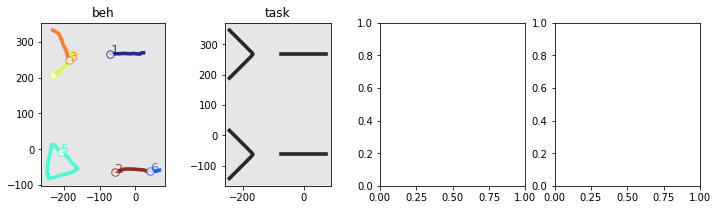

In [13]:
# test the construct validity of verticality/diagonality scores

# compare verticality score to actual plot
import random
trial = random.choice(range(len(df)))

print("trial: ", trial)
print("verticality: ", df.iloc[trial]['verticality'])
D.plotSingleTrial(trial);

In [16]:
# for each TASK: find average verticality score in VERTICAL, HORIZONTAL conditions; plot 2-pt line
import math
import seaborn as sns
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_cleaned = df[df['verticality']!=-1]
df_cleaned = df_cleaned[df_cleaned["monkey_train_or_test"]=="test"]
# get all unique task names
unique_tasks = df_cleaned['unique_task_name'].unique()

# create blank dataframe
plot_data = pd.DataFrame(columns=['unique_task_name', 'verticality_average', 'epoch'])

# loop through unique task names
for t in unique_tasks:
    t_done = df_cleaned[df_cleaned['unique_task_name']==t]
    
    # get task data from vertical sessions
    td_vert = t_done[t_done['epoch']=='vert']
    tdv_avg = td_vert['verticality'].mean()
    
    # get task data from horizontal sessions
    td_horiz = t_done[t_done['epoch']=='horiz']
    tdh_avg = td_horiz['verticality'].mean()
    
    # add entry to plot_dataframe
    if math.isnan(tdv_avg) or math.isnan(tdh_avg):
        continue # task wasn't shown in both vertical/horizontal epochs; or data was all pruned for one
    else:
        plot_data.loc[len(plot_data)] = [t, tdv_avg, 1.0]
        plot_data.loc[len(plot_data)] = [t, tdh_avg, 2.0]

In [23]:
plot_data

,unique_task_name,verticality_average,epoch
0,mixture2-ss-1_1-594155,0.354167,1.0
1,mixture2-ss-1_1-594155,0.150000,2.0
2,mixture2-ss-1_1-645781,1.000000,1.0
3,mixture2-ss-1_1-645781,1.000000,2.0
4,mixture2-ss-6_1-625387,0.833333,1.0
5,mixture2-ss-6_1-625387,1.000000,2.0
6,mixture2-ss-8_1-715421,0.462500,1.0
7,mixture2-ss-8_1-715421,0.416667,2.0
8,mixture2-ss-1_1-351788,0.166667,1.0
9,mixture2-ss-1_1-351788,0.291667,2.0


n: 40.0


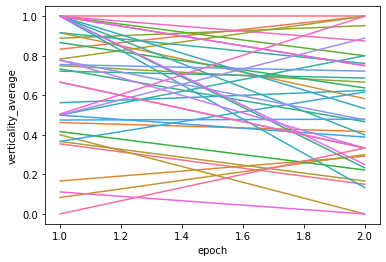

In [17]:
# plot both upward/downward sloping

# df_total = pd.concat([plot_data1,plot_data2]).reset_index(drop=True)
sns.lineplot(data=plot_data[plot_data["epoch"].isin([1.0, 2.0])], x="epoch", y="verticality_average",
             hue="unique_task_name",legend=False)
print("n:", len(plot_data)/2)

In [20]:
# paired t-test
from scipy import stats

pd_v = plot_data[plot_data["epoch"]==1].reset_index(drop=True)["verticality_average"]
pd_h = plot_data[plot_data["epoch"]==2].reset_index(drop=True)["verticality_average"]

stats.ttest_rel(pd_v, pd_h) # H0: two samples are the SAME; if p < 0.05, can reject

Ttest_relResult(statistic=2.7693786924639276, pvalue=0.00855347296050605)

Text(0, 0.5, 'occurrences')

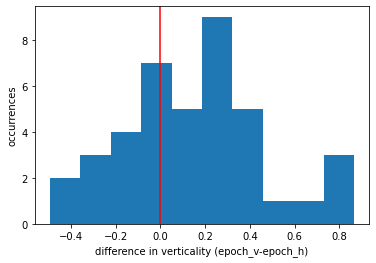

In [21]:
# histogram of differences
diff = pd_v - pd_h
plt.hist(diff)
plt.axvline(0,color='red')
plt.xlabel('difference in verticality (epoch_v-epoch_h)')
plt.ylabel('occurrences')

unique_task_name:  mixture2-ss-2_1-574046
verticality_delta:  0.25
trial_num_v:  654
trial_num_h:  1691


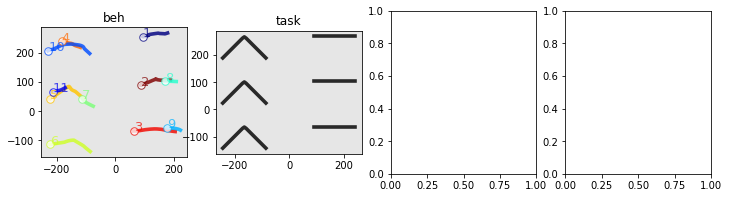

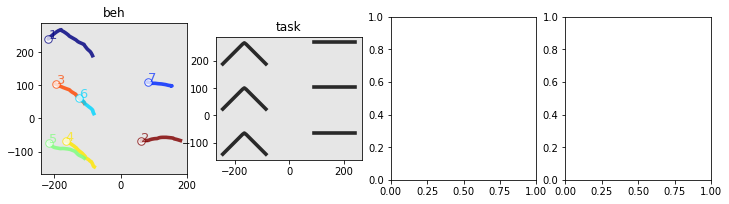

In [29]:
# add delta into new version of plot_data; contains 1 copy of each test task
plot_data_epoch1 = plot_data[plot_data["epoch"]==1].reset_index(drop=True)
plot_data_epoch1['verticality_delta'] = diff

# compare actual trial to difference
import random
task_num = random.choice(range(len(plot_data_epoch1)))
task_name = plot_data_epoch1.iloc[task_num]['unique_task_name']
task_delta = plot_data_epoch1.iloc[task_num]['verticality_delta']

print("unique_task_name: ", task_name)
print("verticality_delta: ", task_delta)

# plot 1 trial from vertical (epoch=1) and 1 from horizontal (epoch=2)
trial_pool = df[df['unique_task_name']==task_name]
trial_v = trial_pool[trial_pool['epoch']=='vert'].index
trial_h = trial_pool[trial_pool['epoch']=='horiz'].index

# and see if calculated delta matches up to difference b/w vertical(top) & horizontal(bottom) figs
if len(trial_v)>0 and len(trial_h)>0:
    trial_num_v = trial_v[random.choice(range(len(trial_v)))]
    trial_num_h = trial_h[random.choice(range(len(trial_v)))]
    print("trial_num_v: ", trial_num_v)
    print("trial_num_h: ", trial_num_h)
    D.plotSingleTrial(trial_num_v);
    D.plotSingleTrial(trial_num_h);

In [64]:
#df["tvalfake"]

In [49]:
#df["datetime"]

Text(0, 0.5, 'verticality_score')

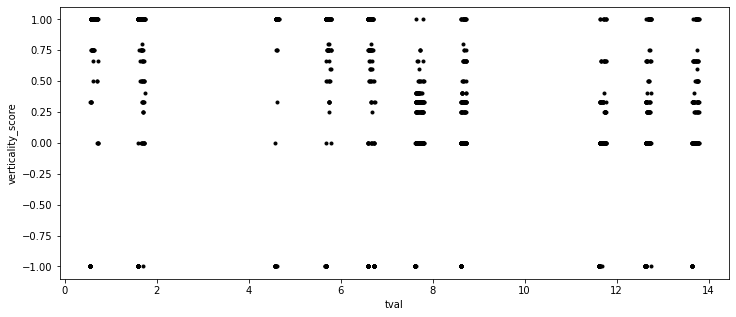

In [16]:
# plot verticality vs time
import matplotlib.pyplot as plt

# plot tvalfake vs. verticality (first step)
fig,axes = plt.subplots(1,1,figsize=(12, 5))
axes.plot(df["tvalfake"], df["verticality"], ".k")
axes.set_xlabel("tval")
axes.set_ylabel("verticality_score")

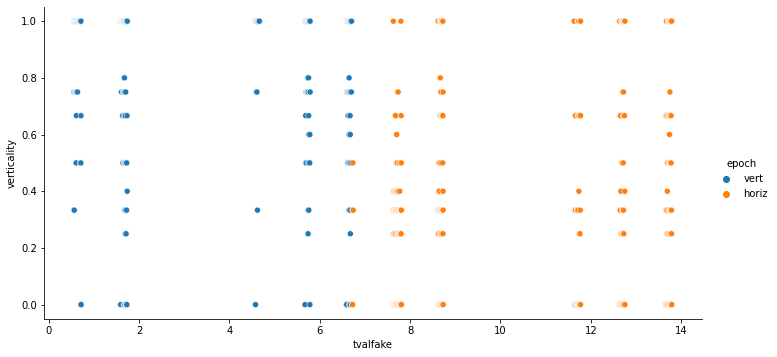

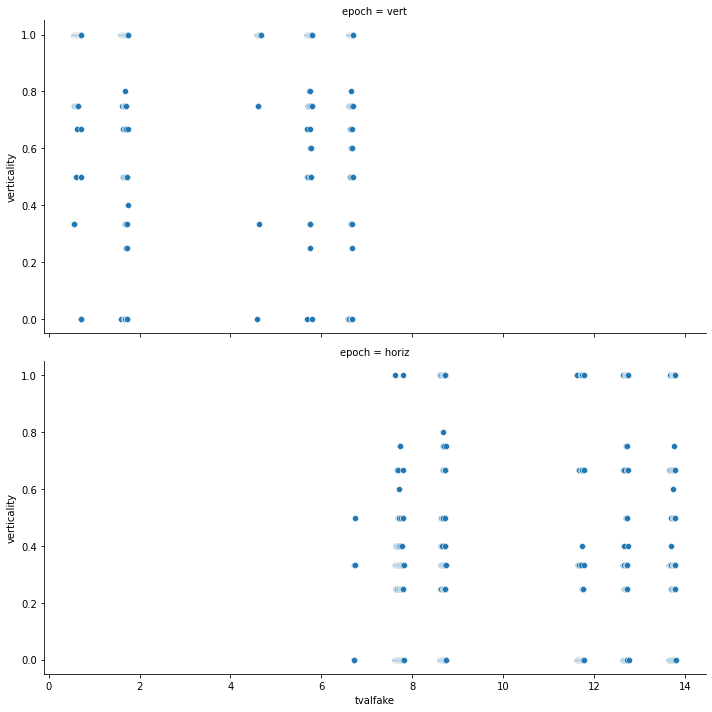

In [17]:
## DETAILED VERTICALITY PLOTS

import seaborn as sns

df_cleaned = df[df["verticality"]!=-1]
# replicate above plot (tvalfake vs. verticality)
sns.pairplot(df_cleaned, x_vars=['tvalfake'], y_vars=['verticality'], height=5, aspect=2, hue='epoch')

# split into two separate plots, by epoch
sns.relplot(data=df_cleaned, x='tvalfake', y='verticality', height=5, aspect=2, row='epoch')

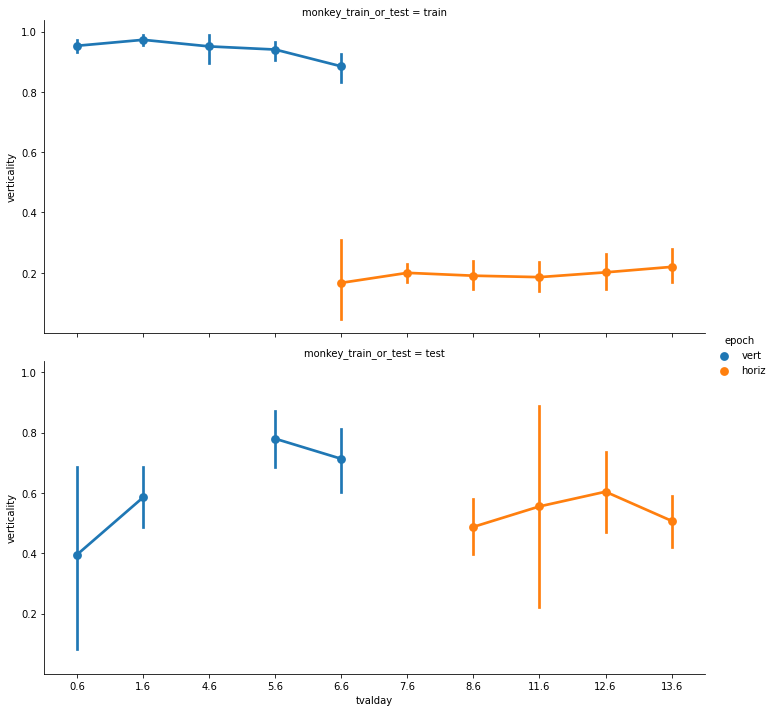

In [18]:
# now plot each day's mean, against time
# plots 95% confidence interval (of mean, b/c of noise)

sns.catplot(data=df_cleaned, x='tvalday', y='verticality', height=5, aspect=2, hue='epoch',
            kind='point', row='monkey_train_or_test')

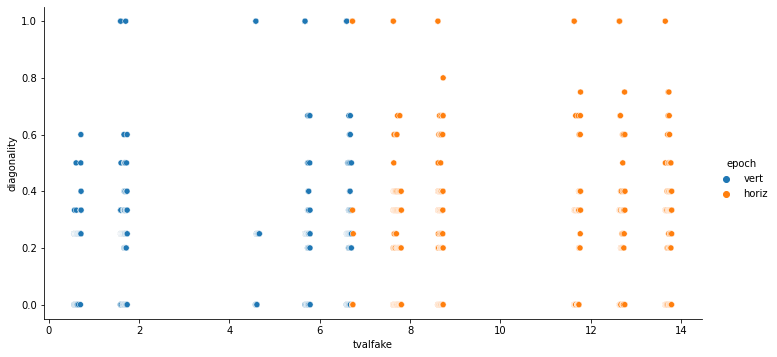

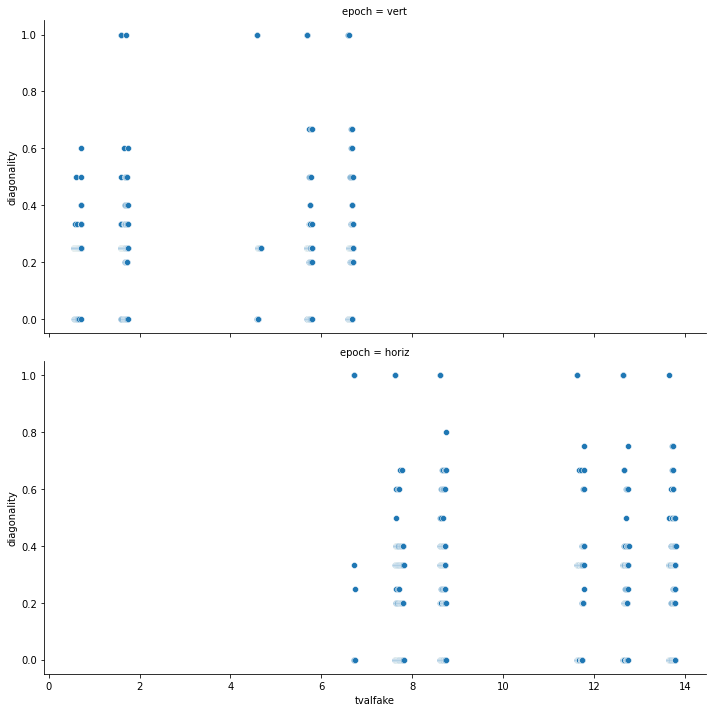

In [19]:
# DIAGONALITY PLOTS
import seaborn as sns

df_cleaned = df[df["diagonality"]!=-1]
# replicate above plot (tvalfake vs. verticality)
sns.pairplot(df_cleaned, x_vars=['tvalfake'], y_vars=['diagonality'], height=5, aspect=2, hue='epoch')

# split into two separate plots, by epoch
sns.relplot(data=df_cleaned, x='tvalfake', y='diagonality', height=5, aspect=2, row='epoch')

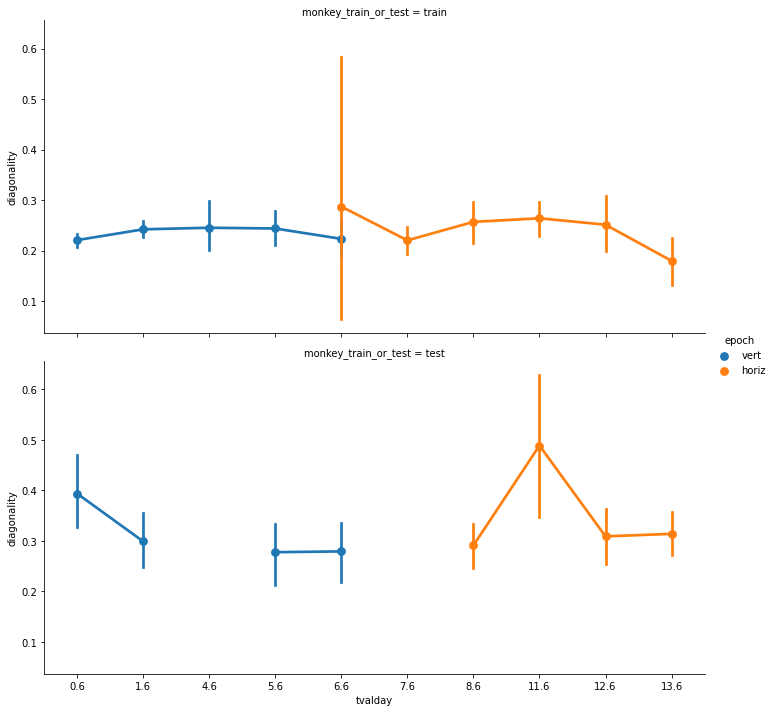

In [20]:
# now plot each day's mean, against time
# plots 95% confidence interval (of mean, b/c of noise)

sns.catplot(data=df_cleaned, x='tvalday', y='diagonality', height=5, aspect=2, hue='epoch',
            kind='point', row='monkey_train_or_test')